
DL Assignment No. 2
Implementing Feedforward neural networks with Keras and TensorFlow
a. Import the necessary packages

b. Load the training and testing data (MNIST/CIFAR10)

c. Define the network architecture using Keras

d. Train the model using SGD

e. Evaluate the network

f. Plot the training loss and accuracy



In [2]:
#Import Packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [3]:
#load the data #len shape array feature scaling array
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()


In [4]:
print(len(x_train))
print(len(x_test))

60000
10000


In [5]:
print(x_train.shape)
print(x_test.shape)
print(x_train[0])

(60000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  1

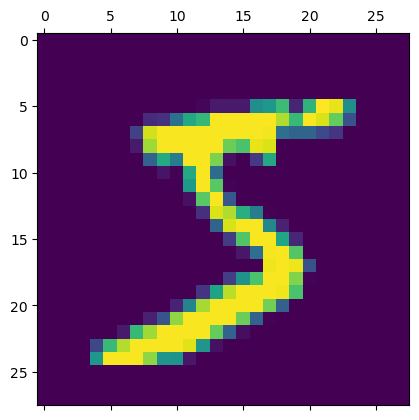

In [6]:
plt.matshow(x_train[0])

In [7]:
#Feature Scaling
x_train=x_train/255
x_test=x_test/255 

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
#defining network architecture using keras
model=tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
#train the model using sgd
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_data= (x_test,y_test),epochs=6 , verbose=2)

Epoch 1/6
1875/1875 - 7s - loss: 0.6516 - accuracy: 0.8364 - val_loss: 0.3562 - val_accuracy: 0.9044 - 7s/epoch - 4ms/step
Epoch 2/6
1875/1875 - 5s - loss: 0.3362 - accuracy: 0.9070 - val_loss: 0.2916 - val_accuracy: 0.9186 - 5s/epoch - 3ms/step
Epoch 3/6
1875/1875 - 6s - loss: 0.2881 - accuracy: 0.9191 - val_loss: 0.2602 - val_accuracy: 0.9287 - 6s/epoch - 3ms/step
Epoch 4/6
1875/1875 - 5s - loss: 0.2581 - accuracy: 0.9281 - val_loss: 0.2379 - val_accuracy: 0.9326 - 5s/epoch - 3ms/step
Epoch 5/6
1875/1875 - 5s - loss: 0.2361 - accuracy: 0.9344 - val_loss: 0.2193 - val_accuracy: 0.9374 - 5s/epoch - 3ms/step
Epoch 6/6
1875/1875 - 5s - loss: 0.2178 - accuracy: 0.9393 - val_loss: 0.2061 - val_accuracy: 0.9419 - 5s/epoch - 3ms/step


In [12]:
#evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=",test_loss)
print("Accuracy=",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2061 - accuracy: 0.9419
Loss= 0.20605511963367462
Accuracy= 0.9419000148773193


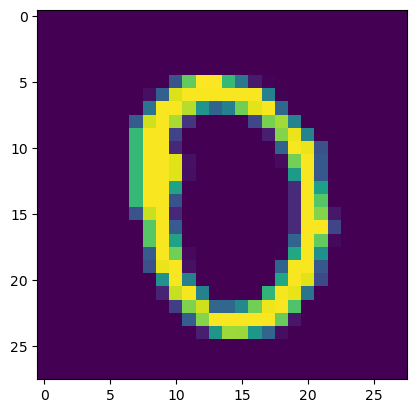

In [13]:
n=random.randint(0,9999)
plt.imshow(x_test[n])

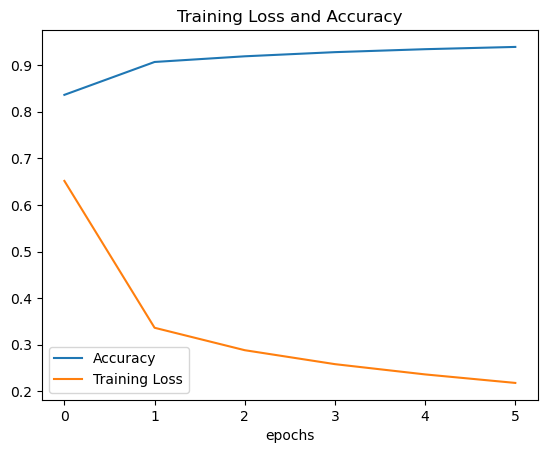

In [15]:
#plot the training loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Training Loss and Accuracy')
plt.xlabel("epochs")
plt.legend(["Accuracy","Training Loss"],loc= 'lower left')